In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pancreas/csv_result-versionameliotyp112.csv


# Data Analysis

In [8]:
import numpy as np # linear algebra
import pandas as pd 

In [9]:
df = pd.read_csv('../input/pancreas/csv_result-versionameliotyp112.csv')


In [10]:
#removing duplicate '' sign in features' names
df.columns = ['id', 'age', 'sexe', 'hta', 'diabete', 'dsylipidemie', 'lv',
       'cholecystectomie', 'atcd-pa', 'atcd-neopers', 'atcd-chgpanc',
       'atcd-kh', 'contage-hydatique', 'vhl', 'pa-actuel',
       'stade-pa', 'pant-chroniq', 'douleur-abd', 'ictere',
       'pousse-pa', 'aeg', 'stenose-diges-haut', 'ca19-9', 'ca12-5',
       'ace', 'recul', 'nbr-lesions', 'taille', 'forme',
       'localisat-tete', 'localisat-isthme', 'localisat-corps',
       'localisat-queue', 'localisat-uncus', 'paroi', 'epaisseur',
       'rehaussemt-parietal', 'compsante-nodulaire', 'calcification',
       'septa', 'epaisseur-septa', 'locul', 'cicatrice-central',
       'taille-cicatric', 'contenu-hem-aer', 'wirsung',
       'communicat-av-canaux-panc', 'dilatation-vb', 'signe-pc',
       'anomalie-extra-panc', 'issue-mucine', 'diagnostic-resultat']

#further unecessary columns : 'dsylipidemie', 'atcd-chgpanc', 'atcd-pa', 'atcd-kh', 'vhl', 'pant-chroniq', 'pousse-pa', 'ca12-5', 'cicatrice-central', 'dilatation-vb', 'signe-pc','issue-mucine' 

**Dropping Colmuns**

In [11]:
#drop id column
df = df.drop(['id','dsylipidemie', 'atcd-chgpanc', 'atcd-pa', 'atcd-kh', 'vhl', 'pant-chroniq', 'pousse-pa', 'ca12-5', 'cicatrice-central', 'dilatation-vb', 'signe-pc','issue-mucine'], axis=1)

In [12]:
# drop empty lines 
df = df.drop(df.index[[55, 58, 59, 60, 76]])
df = df.reset_index(drop=True)

In [13]:
#coorecting a typo of tpps' instead of tpps
df['diagnostic-resultat'][66] = 'tpps'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='diagnostic-resultat', ylabel='rehaussemt-parietal'>

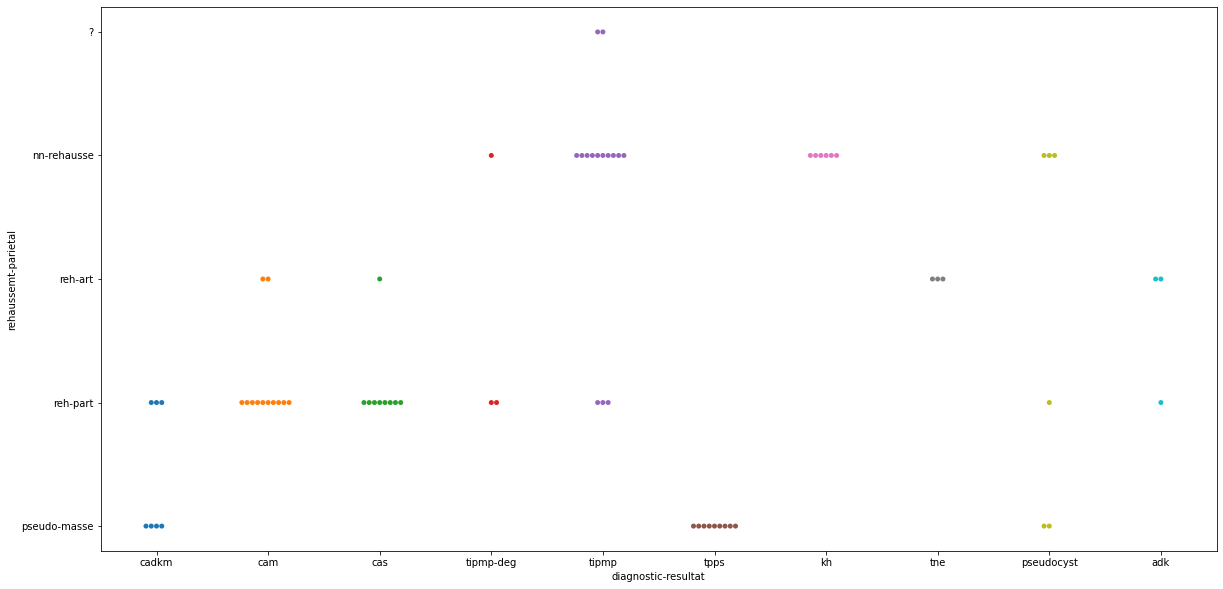

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.swarmplot(x=df['diagnostic-resultat'],
              y=df['rehaussemt-parietal'])

**Replacing missing data**

In [15]:
#replace '?' with -1 in for numerical data
df['ca19-9'] = df['ca19-9'].replace(['?'],-1)
df['ca19-9'] = df['ca19-9'].astype("float64")

In [16]:
df['ace'] = df['ace'].replace(['?'],-1)
df['ace'] = df['ace'].astype("float64")

df['epaisseur'] = df['epaisseur'].replace(['?'],-1)
df['epaisseur'] = df['epaisseur'].astype("float64")

df['taille-cicatric'] = df['taille-cicatric'].replace(['?'],-1)
df['taille-cicatric'] = df['taille-cicatric'].astype("float64")

In [17]:
df.dtypes

age                          float64
sexe                          object
hta                           object
diabete                       object
lv                            object
cholecystectomie              object
atcd-neopers                  object
contage-hydatique             object
pa-actuel                     object
stade-pa                      object
douleur-abd                   object
ictere                        object
aeg                           object
stenose-diges-haut            object
ca19-9                       float64
ace                          float64
recul                         object
nbr-lesions                   object
taille                       float64
forme                         object
localisat-tete                object
localisat-isthme              object
localisat-corps               object
localisat-queue               object
localisat-uncus               object
paroi                         object
epaisseur                    float64
r

In [18]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
newdf

,age,ca19-9,ace,taille,epaisseur,taille-cicatric
0,22.0,-1.0,-1.0,116.0,16.0,-1.0
1,67.0,61.0,0.0,50.0,6.0,-1.0
2,47.0,0.0,0.0,52.0,3.0,-1.0
3,58.0,-1.0,-1.0,80.0,5.5,-1.0
4,36.0,-1.0,-1.0,60.0,25.0,-1.0
...,...,...,...,...,...,...
68,57.0,0.0,0.0,23.0,-1.0,1.3
69,82.0,-1.0,-1.0,31.0,-1.0,-1.0
70,63.0,-1.0,-1.0,8.0,-1.0,-1.0
71,82.0,-1.0,-1.0,185.0,-1.0,-1.0


# Training

In [19]:
from catboost import Pool, CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [20]:
# delete more useless columns
df1 = df.drop(['stade-pa', 'stenose-diges-haut',  'contenu-hem-aer', 'ictere', 'pa-actuel', 'cholecystectomie'], axis=1)

In [21]:
x = df.drop(['diagnostic-resultat'], axis=1)
y = df['diagnostic-resultat']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 2)

In [23]:
import catboost.utils as cbu

categorical_features_indices = np.where(x.dtypes != np.float)[0]

model=CatBoostClassifier(iterations=58, depth=5, learning_rate=0.1, loss_function='MultiClass', eval_metric='Accuracy'
)

train_dataset = Pool(data=x_train,
                     label=y_train,
                     cat_features=categorical_features_indices)

eval_dataset = Pool(data=x_test,
                    label=y_test,
                    cat_features=categorical_features_indices)


#model.fit(x_train, y_train,cat_features=categorical_features_indices,eval_set=(x_test, y_test),plot=True)
#model.fit(train_dataset,eval_set = eval_dataset )
model.fit(train_dataset)
preds = model.predict(x_test)  #garder une trace des prédictions 

0:	learn: 0.2413793	total: 64.3ms	remaining: 3.66s
1:	learn: 0.3965517	total: 115ms	remaining: 3.21s
2:	learn: 0.4655172	total: 138ms	remaining: 2.53s
3:	learn: 0.5172414	total: 162ms	remaining: 2.19s
4:	learn: 0.6551724	total: 186ms	remaining: 1.97s
5:	learn: 0.5517241	total: 200ms	remaining: 1.74s
6:	learn: 0.5344828	total: 224ms	remaining: 1.63s
7:	learn: 0.6206897	total: 248ms	remaining: 1.55s
8:	learn: 0.5862069	total: 272ms	remaining: 1.48s
9:	learn: 0.6724138	total: 296ms	remaining: 1.42s
10:	learn: 0.6034483	total: 305ms	remaining: 1.3s
11:	learn: 0.5862069	total: 329ms	remaining: 1.26s
12:	learn: 0.5862069	total: 353ms	remaining: 1.22s
13:	learn: 0.6551724	total: 376ms	remaining: 1.18s
14:	learn: 0.6724138	total: 400ms	remaining: 1.15s
15:	learn: 0.7068966	total: 423ms	remaining: 1.11s
16:	learn: 0.6896552	total: 447ms	remaining: 1.08s
17:	learn: 0.7068966	total: 470ms	remaining: 1.04s
18:	learn: 0.7068966	total: 494ms	remaining: 1.01s
19:	learn: 0.7758621	total: 518ms	remaini

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix
lr_score = accuracy_score(y_test, preds)
print(lr_score)
confusion_matrix(y_test, preds)

0.7333333333333333


array([[2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 4]])

#### Improvement

In [25]:
# after deleting more useless columns
x = df1.drop(['diagnostic-resultat'], axis=1)
y = df1['diagnostic-resultat']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 12)
#12

import catboost.utils as cbu

categorical_features_indices = np.where(x.dtypes != np.float)[0]

model=CatBoostClassifier(iterations=60, depth=5, learning_rate=0.1, loss_function='MultiClass', eval_metric='Accuracy')

train_dataset = Pool(data=x_train,
                     label=y_train,
                     cat_features=categorical_features_indices)

eval_dataset = Pool(data=x_test,
                    label=y_test,
                    cat_features=categorical_features_indices)


#model.fit(x_train, y_train,cat_features=categorical_features_indices,eval_set=(x_test, y_test),plot=True)
model.fit(train_dataset)
y_preds_proba = model.predict_proba(x_test)
y_preds = model.predict(x_test)

0:	learn: 0.3275862	total: 15ms	remaining: 883ms
1:	learn: 0.4482759	total: 38.8ms	remaining: 1.13s
2:	learn: 0.5000000	total: 61.3ms	remaining: 1.17s
3:	learn: 0.5344828	total: 84.7ms	remaining: 1.19s
4:	learn: 0.5517241	total: 90.4ms	remaining: 995ms
5:	learn: 0.6034483	total: 104ms	remaining: 934ms
6:	learn: 0.6724138	total: 126ms	remaining: 953ms
7:	learn: 0.6551724	total: 148ms	remaining: 963ms
8:	learn: 0.6206897	total: 153ms	remaining: 868ms
9:	learn: 0.6034483	total: 158ms	remaining: 790ms
10:	learn: 0.5862069	total: 182ms	remaining: 810ms
11:	learn: 0.6206897	total: 204ms	remaining: 815ms
12:	learn: 0.6724138	total: 226ms	remaining: 819ms
13:	learn: 0.6896552	total: 248ms	remaining: 816ms
14:	learn: 0.6896552	total: 270ms	remaining: 811ms
15:	learn: 0.6896552	total: 294ms	remaining: 808ms
16:	learn: 0.7241379	total: 316ms	remaining: 799ms
17:	learn: 0.7413793	total: 338ms	remaining: 788ms
18:	learn: 0.7413793	total: 347ms	remaining: 748ms
19:	learn: 0.7241379	total: 360ms	rema

In [26]:
y_preds_proba
y_preds

array([['tipmp'],
       ['cam'],
       ['tipmp'],
       ['cadkm'],
       ['tpps'],
       ['cam'],
       ['cas'],
       ['cam'],
       ['cas'],
       ['tipmp'],
       ['cam'],
       ['tpps'],
       ['cadkm'],
       ['tipmp'],
       ['tpps']], dtype=object)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix
score = accuracy_score(y_test, y_preds)
print(score)
confusion_matrix(y_test, y_preds)

0.8


array([[2, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 4, 0],
       [0, 0, 0, 0, 0, 0, 3]])

# Uncertainty Quantification

### Through Bayesian Ensembles

Data Uncertainty : 

$Uncert_{data} = E_{p(\theta|D)}[H[P(y|x;\theta)]]$

Shannon's Entropy : 
$H(X) = -\sum_{A \in \Omega}p(A)\log p(A)$

In [28]:
# calculating Shannon Entropy 
# the epsilon serves the case when a probability  = 0 
def entropy(probs, epsilon=1e-8):
    log_probs = -np.log(probs + epsilon)
    return np.sum(probs * log_probs, axis=0)/np.log(10)  # to normalize

The max entropy is obtained using a uniforma probability distribution  
                 $H_{max}(X) = -\sum_{i=1}^{n}\frac{1}{n}\log \frac{1}{n} = \log n = \log(10) = 2.3$

In [29]:
np.log(10)  # the maximum entropy 

2.302585092994046

N = 10 is the number of PC cysts types present in the dataset : $\Omega$ = {cadkm, cam, cas, tipmp-deg, tpps, tipmp, kh, tne, pseudocyst, adk}

In [30]:
entropy(y_preds_proba[0])   # entropy on the predictions computed for the 1st patient in the test dataset

0.6561985795136572

In [31]:
entropies = []   # table of entropies with regard to every patient in the test dataset
for i in range(y_preds_proba.shape[0]):
    entropies.append(entropy(y_preds_proba[i]))

In [32]:
entropies

[0.6561985795136572,
 0.7318490721024591,
 0.7779219496039239,
 0.9044411459011107,
 0.917782365523738,
 0.8252410955590236,
 0.7737265580819427,
 0.9228099372898192,
 0.8302587456154958,
 0.597171933904696,
 0.7743135447473098,
 0.9252538455421863,
 0.9013849695864206,
 0.878063834254597,
 0.9014797415725121]

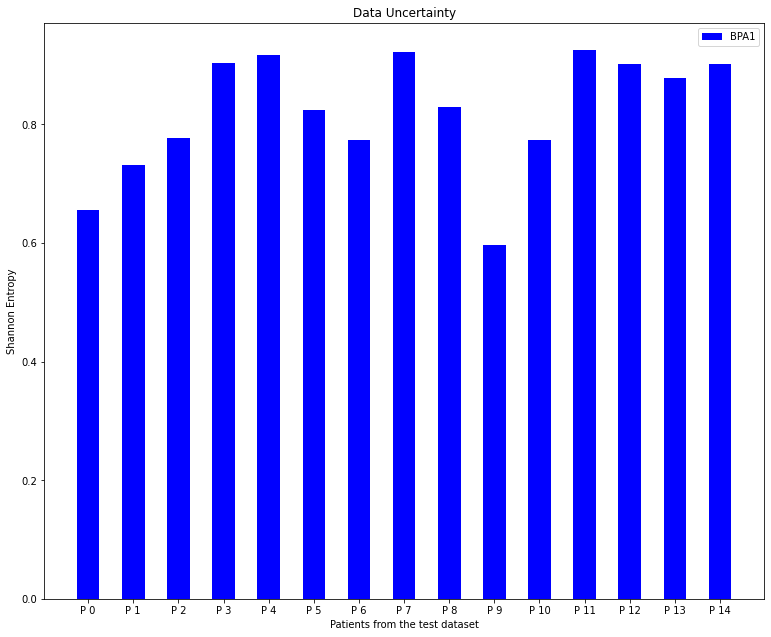

In [33]:
# plotting entropies
import numpy as np
import matplotlib.pyplot as plt

x =np.arange(15)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0, 0, 1, 1])

name_patients = []
for i in range(15):
    name_patients.append('P '+str(i))

bar1 = ax.bar(name_patients,entropies, color='blue', width = 0.5)
plt.xlabel("Patients from the test dataset")
plt.ylabel("Shannon Entropy")
plt.title("Data Uncertainty")
plt.legend([bar1], ["BPA1"])


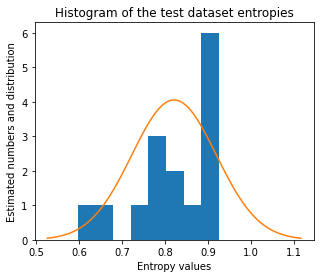

In [34]:
import math
import scipy.stats as stats

variance = np.var(entropies)
sigma = sigma = math.sqrt(variance)
mu = np.mean(entropies)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.figure(figsize=(5,4))
plt.hist(entropies, bins=8)
plt.xlabel("Entropy values")
plt.ylabel("Estimated numbers and distribution")
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title("Histogram of the test dataset entropies")
plt.show()

### Total Uncertainty

Total Uncertainty : 

$Uncert_{total} = H[P(y|x, D)]$

where : $P(y|x, D) = E_{p(\theta|D)}[P(y|x; \theta)] = \frac{1}{N}\sum_{n=1}^{n=N}P(y|x; \theta^{(n)})$

In [36]:
# using model ensembles --> 10 models here  
def ensemble(train_pool,test, num_samples=10, iters=60, lr=0.1):
    ens_preds = []
    ens_preds_proba = []
    data_uncertainties = []
    for seed in range(num_samples):
        model = CatBoostClassifier(random_seed=seed, iterations=iters,
                                  loss_function='MultiClass', eval_metric='Accuracy')
        model.fit(train_pool)
        ens_preds.append(model.predict(test))
        ens_preds_proba.append(model.predict_proba(test))
        entropies = []   # table des entropies sur tous les patients de la test-dataset
        for i in range(model.predict_proba(test).shape[0]):
            entropies.append(entropy(model.predict_proba(test)[i]))
        data_uncertainties.append(np.mean(entropies))
    return ens_preds, ens_preds_proba, data_uncertainties

In [37]:
ens_preds, ens_preds_proba, data_uncertainties = ensemble(train_dataset,x_test)

Learning rate set to 0.5
0:	learn: 0.3275862	total: 10.4ms	remaining: 615ms
1:	learn: 0.4482759	total: 37.7ms	remaining: 1.09s
2:	learn: 0.5517241	total: 64.3ms	remaining: 1.22s
3:	learn: 0.6379310	total: 92.1ms	remaining: 1.29s
4:	learn: 0.6724138	total: 118ms	remaining: 1.3s
5:	learn: 0.7758621	total: 145ms	remaining: 1.3s
6:	learn: 0.8448276	total: 171ms	remaining: 1.3s
7:	learn: 0.8965517	total: 198ms	remaining: 1.29s
8:	learn: 0.8965517	total: 225ms	remaining: 1.28s
9:	learn: 0.8965517	total: 252ms	remaining: 1.26s
10:	learn: 0.8965517	total: 280ms	remaining: 1.25s
11:	learn: 0.8965517	total: 306ms	remaining: 1.22s
12:	learn: 0.9137931	total: 332ms	remaining: 1.2s
13:	learn: 0.9482759	total: 359ms	remaining: 1.18s
14:	learn: 0.9655172	total: 385ms	remaining: 1.16s
15:	learn: 0.9827586	total: 412ms	remaining: 1.13s
16:	learn: 0.9827586	total: 440ms	remaining: 1.11s
17:	learn: 0.9827586	total: 466ms	remaining: 1.09s
18:	learn: 0.9827586	total: 493ms	remaining: 1.06s
19:	learn: 0.982

In [38]:
# commputing the mean model through averaging predicted classification probabilites from every considered model 
ens_mean = np.mean(ens_preds_proba, axis=0)
ens_mean # with probabilites for different patients in the test dataset

array([[0.01092461, 0.0091396 , 0.01653578, 0.01293811, 0.01703763,
        0.07230041, 0.72159503, 0.11565906, 0.01369505, 0.01017473],
       [0.01319705, 0.01423387, 0.77128188, 0.06229186, 0.06002057,
        0.01721983, 0.0140476 , 0.00817655, 0.02090468, 0.01862612],
       [0.01667429, 0.01792543, 0.03844964, 0.12361433, 0.04034665,
        0.05202286, 0.48621398, 0.18099729, 0.0223592 , 0.02139632],
       [0.19285453, 0.25928833, 0.22205725, 0.06772835, 0.02797675,
        0.03611579, 0.03122183, 0.02315834, 0.05102908, 0.08856975],
       [0.05316113, 0.06766405, 0.06397167, 0.0614133 , 0.04477952,
        0.02501502, 0.02595777, 0.01644282, 0.03928511, 0.60230961],
       [0.04173376, 0.02237769, 0.55767509, 0.19148303, 0.02019195,
        0.03526458, 0.0495557 , 0.01578447, 0.04869298, 0.01724075],
       [0.01350518, 0.01559831, 0.13575554, 0.70679288, 0.02024687,
        0.03003622, 0.02863093, 0.0122119 , 0.01724746, 0.0199747 ],
       [0.04132256, 0.13183678, 0.1728448

In [ ]:
# calculating entropy relevant to the overall uncertainty 
ens_entropies = []
for i in range(ens_mean.shape[0]):
    ens_entropies.append(entropy(ens_mean[i]))

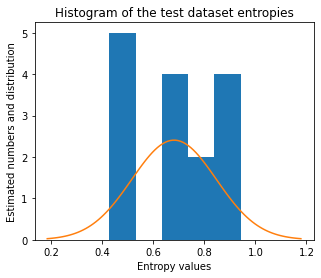

In [91]:
import math
import scipy.stats as stats

variance = np.var(ens_entropies)
sigma = sigma = math.sqrt(variance)
mu = np.mean(ens_entropies)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.figure(figsize=(5,4))
plt.hist(ens_entropies, bins=5)
plt.xlabel("Entropy values")
plt.ylabel("Estimated numbers and distribution")
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title("Histogram of the test dataset entropies")
plt.show()

Text(0.5, 1.0, 'Overall Uncertainty after combining 10 models')

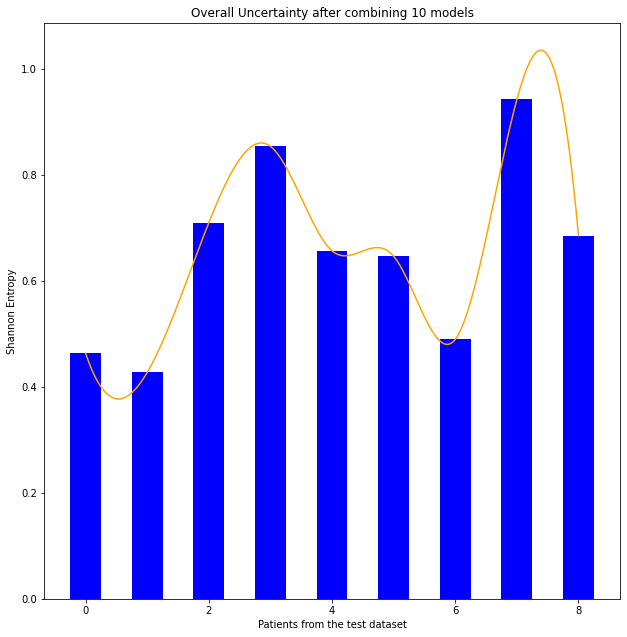

In [158]:
from scipy.interpolate import make_interp_spline

X = np.arange(9)
X_ = np.linspace(X.min(), X.max(), 500)

fig = plt.figure(figsize = (8,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(X , ens_entropies[:9], color = 'b', width = 0.5)

X_Y_Spline = make_interp_spline(X, ens_entropies[:9])
ax.plot(X_, X_Y_Spline(X_), 'orange')

plt.xlabel("Patients from the test dataset")
plt.ylabel("Shannon Entropy")
plt.title("Overall Uncertainty after combining 10 models")



### Total Uncertainty

In [93]:
# the overall uncertainty 
overall_uncert = np.mean(ens_entropies)
overall_uncert

0.6808997420063103

In [94]:
ens_entropies

[0.4629708723947679,
 0.4273048557178546,
 0.7098929598556917,
 0.8537554692911199,
 0.6565033723189967,
 0.6462653038810595,
 0.489607416701122,
 0.9421772012449453,
 0.6852847869629489,
 0.5225086776669229,
 0.8252546527884873,
 0.8655484953786369,
 0.7603737313099735,
 0.8788987041784961,
 0.4871496304036294]

In [95]:
data_uncertainties

[0.5672284742746012,
 0.6743489094830697,
 0.5366837969478816,
 0.6450485148692123]

In [96]:
overall_uncert - np.mean(data_uncertainties)

0.07507231811261916

### Knowledge Uncertainty

Knowledge Uncertainty : 

$Uncert_{knowledge} = H[P(y|x, D)] - E_{p(\theta|D)}[H[P(y|x;\theta)]]$

In [97]:
# mean_data_uncert, overall_uncert
data_uncert = np.mean(data_uncertainties)
know_uncert = overall_uncert - data_uncert

print(f"data uncertainty : {data_uncert}")
print(f"knowledge uncertainty : {know_uncert}")
print(f"the overall uncertainty : {overall_uncert}")

data uncertainty : 0.6058274238936912
knowledge uncertainty : 0.07507231811261916
the overall uncertainty : 0.6808997420063103


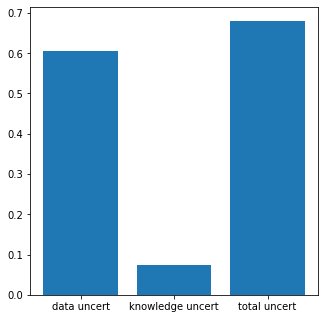

In [98]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_axes([0,0,1,1])
uncert = ['data uncert', 'knowledge uncert', 'total uncert']
uncert_values = [data_uncert,know_uncert,overall_uncert]
ax.bar(uncert,uncert_values)
plt.show()

# Demspter Shafer

### BPA measuring

-------- First Model --------

In [99]:
# choosing 2 models with different parameters 
depth =5
lr = 0.1 # 0.2

iters = 50

model1 = CatBoostClassifier(random_seed = 0, depth=5, iterations=iters, learning_rate=lr, 
                                  loss_function='MultiClass', eval_metric='Accuracy')


model1.fit(train_dataset)
y_preds_proba1 = model1.predict_proba(x_test)
y_preds1 = model1.predict(x_test)


0:	learn: 0.3275862	total: 16.5ms	remaining: 808ms
1:	learn: 0.4482759	total: 39.7ms	remaining: 952ms
2:	learn: 0.5000000	total: 62.6ms	remaining: 981ms
3:	learn: 0.5344828	total: 85.2ms	remaining: 980ms
4:	learn: 0.5517241	total: 90.3ms	remaining: 812ms
5:	learn: 0.6034483	total: 104ms	remaining: 763ms
6:	learn: 0.6724138	total: 126ms	remaining: 777ms
7:	learn: 0.6551724	total: 149ms	remaining: 783ms
8:	learn: 0.6206897	total: 154ms	remaining: 703ms
9:	learn: 0.6034483	total: 159ms	remaining: 637ms
10:	learn: 0.5862069	total: 182ms	remaining: 645ms
11:	learn: 0.6206897	total: 204ms	remaining: 648ms
12:	learn: 0.6724138	total: 228ms	remaining: 649ms
13:	learn: 0.6896552	total: 251ms	remaining: 646ms
14:	learn: 0.6896552	total: 274ms	remaining: 639ms
15:	learn: 0.6896552	total: 297ms	remaining: 630ms
16:	learn: 0.7241379	total: 319ms	remaining: 619ms
17:	learn: 0.7413793	total: 342ms	remaining: 608ms
18:	learn: 0.7413793	total: 350ms	remaining: 571ms
19:	learn: 0.7241379	total: 364ms	re

-------- Second Model --------

In [100]:
model2 = CatBoostClassifier(random_seed= 0, depth=5, iterations=iters, learning_rate=lr+0.1, 
                                  loss_function='MultiClass', eval_metric='Accuracy')
model2.fit(train_dataset)
y_preds_proba2 = model2.predict_proba(x_test)
y_preds2 = model2.predict(x_test)

# model.classes_ pour obtenir la liste des classes (celle ce de modèle et du 1er sont les mêmes)

0:	learn: 0.3275862	total: 14.8ms	remaining: 726ms
1:	learn: 0.4482759	total: 38.2ms	remaining: 916ms
2:	learn: 0.5000000	total: 60.6ms	remaining: 950ms
3:	learn: 0.5689655	total: 83ms	remaining: 955ms
4:	learn: 0.5517241	total: 88.2ms	remaining: 794ms
5:	learn: 0.6034483	total: 102ms	remaining: 747ms
6:	learn: 0.6896552	total: 124ms	remaining: 763ms
7:	learn: 0.7068966	total: 146ms	remaining: 768ms
8:	learn: 0.6551724	total: 151ms	remaining: 690ms
9:	learn: 0.6206897	total: 156ms	remaining: 625ms
10:	learn: 0.6206897	total: 178ms	remaining: 633ms
11:	learn: 0.6724138	total: 201ms	remaining: 636ms
12:	learn: 0.6724138	total: 225ms	remaining: 640ms
13:	learn: 0.7413793	total: 248ms	remaining: 637ms
14:	learn: 0.7586207	total: 270ms	remaining: 631ms
15:	learn: 0.7931034	total: 293ms	remaining: 623ms
16:	learn: 0.7758621	total: 307ms	remaining: 595ms
17:	learn: 0.7758621	total: 329ms	remaining: 585ms
18:	learn: 0.7931034	total: 352ms	remaining: 574ms
19:	learn: 0.8448276	total: 374ms	rema

In [101]:
model1.classes_ == model2.classes_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [102]:
# calculating entropy  
# the epsilon serves the case when a probability  = 0 
def entropy(probs, epsilon=1e-8):
    log_probs = -np.log(probs + epsilon)
    return np.sum(probs * log_probs, axis=0)

### BPA measuring 

------------- Generating BPAs -------------

In [103]:
# function for generating the bpa 

model_classes = model1.classes_  # les deux sont les mêmes 
def bpa(preds):
    """ preds stand for the predicted probabilities for each class"""
    bpa = []
    for i in range(preds.shape[0]):
        preds_sorted = np.sort(preds[i])   # sorting the list 
        index1 = np.where(preds[i] == preds_sorted[-1])   # first max value 
        bpa_i = [0 for i in range(preds.shape[1]+1)]   # taking into account m(omega)
        bpa_i[index1[0][0]] = preds_sorted[-1]     # putting the max value in the right place
        bpa_i[-1] = 1 - preds_sorted[-1] 
        bpa.append(bpa_i)
    return bpa

In [104]:
bpa_model1 = bpa(y_preds_proba1)

bpa_model2 = bpa(y_preds_proba2)

In [105]:
bpa_model1

[[0, 0, 0, 0, 0, 0, 0.518722141284443, 0, 0, 0, 0.48127785871555695],
 [0, 0, 0.46447784206253695, 0, 0, 0, 0, 0, 0, 0, 0.535522157937463],
 [0, 0, 0, 0, 0, 0, 0.38015242312899755, 0, 0, 0, 0.6198475768710024],
 [0, 0.2172033082306904, 0, 0, 0, 0, 0, 0, 0, 0, 0.7827966917693097],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.24951671560620295, 0.7504832843937971],
 [0, 0, 0.28880735030782634, 0, 0, 0, 0, 0, 0, 0, 0.7111926496921737],
 [0, 0, 0, 0.3452123146218956, 0, 0, 0, 0, 0, 0, 0.6547876853781044],
 [0, 0, 0.2893167078876117, 0, 0, 0, 0, 0, 0, 0, 0.7106832921123882],
 [0, 0, 0, 0.2778073253079285, 0, 0, 0, 0, 0, 0, 0.7221926746920715],
 [0, 0, 0, 0, 0, 0, 0.5577262160139019, 0, 0, 0, 0.44227378398609807],
 [0, 0, 0.4324245660159671, 0, 0, 0, 0, 0, 0, 0, 0.5675754339840329],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2550605820199264, 0.7449394179800737],
 [0, 0.2445747900937572, 0, 0, 0, 0, 0, 0, 0, 0, 0.7554252099062428],
 [0, 0, 0, 0, 0, 0, 0.2631132156345885, 0, 0, 0, 0.7368867843654114],
 [0, 0, 0, 0, 0,

### Dempster Shafer rule of combination

In [107]:
model_classes = model1.classes_  # les deux sont les mêmes 

In [108]:
# DS rule of combination
def ds_combination(bpa1, bpa2, number):
    liste = [0 for i in range(2**number)]
    liste[0] = bpa1[0]*bpa2[0] + bpa1[0]*bpa2[-1] + bpa1[-1]*bpa2[0]  # first cyst
    liste[-1] = bpa1[-1]*bpa2[-1]   # omega
    
    if number == 2 : 
        k = bpa1[0]*bpa2[1] + bpa1[1]*bpa2[0]
        liste[0] = liste[0]/(1-k)
        liste[1] = ( bpa1[1]*bpa2[1] + bpa1[1]*bpa2[-1] + bpa1[-1]*bpa2[1] ) /(1-k) # second cyst 
        liste[2] = 0
        liste[-1] = liste[-1]/(1-k)
     
    return liste

In [109]:
# combined BPA from 2 different BPAs
def combined_bpa(bpa1, bpa2, patient_index):
    cysts = []
    cyst1_index = bpa1[patient_index].index(max(bpa1[patient_index][:-1]))   # cyst 1
    cyst2_index = bpa2[patient_index].index(max(bpa2[patient_index][:-1]))   # cyst 2
    cysts.append(model_classes[cyst1_index])   # add name of the 1st cyst
    
    if cyst1_index != cyst2_index :
        cysts.append(model_classes[cyst2_index])  # add name of the 2nd cyst
        cysts.append(model_classes[cyst1_index]+' and ' + model_classes[cyst2_index])  # add the intersection
        
        list_bpa1 = [max(bpa1[patient_index][:-1]), 0, bpa1[patient_index][-1]]
        list_bpa2 = [0, max(bpa2[patient_index][:-1]), bpa2[patient_index][-1]]
        combination  =  ds_combination(list_bpa1, list_bpa2, 2)
    else : 
        list_bpa1 = [max(bpa1[patient_index][:-1]), bpa1[patient_index][-1]]
        list_bpa2 = [max(bpa2[patient_index][:-1]), bpa2[patient_index][-1]]
        combination  =  ds_combination(list_bpa1, list_bpa2, 1)
    cysts.append('omega')
    new_bpa = [cysts,combination ]
    return new_bpa, list_bpa1, list_bpa2

---------- Combining 2 BPAs. --------

In [110]:
# combination for each patient in the test dataset

number_patients = y_preds_proba1.shape[0]
combined_bpas = []     # combined bpa from the 2 bpas using DS rule of combination
list_bpa1 = []
list_bpa2 = []

for patient_index in range(number_patients):
    combined_bpas.append(combined_bpa(bpa_model1, bpa_model2, patient_index)[0])
    list_bpa1.append (combined_bpa(bpa_model1, bpa_model2, patient_index)[1])
    list_bpa2.append (combined_bpa(bpa_model1, bpa_model2, patient_index)[2])

print(combined_bpas)


[[['tipmp', 'omega'], [0.7655463652925871, 0.23445363470741287]], [['cam', 'omega'], [0.7960222700184801, 0.20397772998151983]], [['tipmp', 'omega'], [0.5747774907626576, 0.4252225092373424]], [['cadkm', 'omega'], [0.44071734247476385, 0.5592826575252362]], [['tpps', 'omega'], [0.5342190917480638, 0.46578090825193624]], [['cam', 'cas', 'cam and cas', 'omega'], [0.21145802895776852, 0.2678232436522643, 0, 0.5207187273899672]], [['cas', 'omega'], [0.7645391321597357, 0.2354608678402643]], [['cam', 'omega'], [0.551300641350155, 0.44869935864984495]], [['cas', 'pseudocyst', 'cas and pseudocyst', 'omega'], [0.2160178278060425, 0.22241853210096968, 0, 0.5615636400929878]], [['tipmp', 'omega'], [0.8253559944285511, 0.1746440055714489]], [['cam', 'omega'], [0.6804527582106163, 0.31954724178938365]], [['tpps', 'omega'], [0.4706612972965769, 0.5293387027034231]], [['cadkm', 'tpps', 'cadkm and tpps', 'omega'], [0.1914719123570153, 0.21712326816833832, 0, 0.5914048194746464]], [['tipmp', 'cas', 't

------------- Data Uncertainty using the 2 BPAs ---------

In [111]:
bpa1_entropies = []
bpa2_entropies = []

for i in range(len(list_bpa1)):
    bpa1_entropies.append(entropy(np.asarray(list_bpa1[i])))
    bpa2_entropies.append(entropy(np.asarray(list_bpa2[i])))

In [112]:
np.mean(bpa1_entropies)

0.614830954993124

In [113]:
np.mean(bpa2_entropies)

0.6373402675386631

### Belief and Plausibility measuring 

In [114]:
def belief(bpa):
    """the bpa here must be the combined bpa of a particular patient"""
    liste =  [bpa[0]]   # retrieving the list of cysts names 
    belief_list = []
    if len(bpa[1]) ==4 :
        belief_list.append(bpa[1][0])
        belief_list.append(bpa[1][1])
        belief_list.append(bpa[1][2])
        belief_list.append(bpa[1][-1]+bpa[1][0]+bpa[1][1]+bpa[1][2])
    elif len(bpa[1]) ==2 :
        belief_list.append(bpa[1][0])
        belief_list.append(bpa[1][1]+bpa[1][0])
    else : print("error ! ")
    liste.append(belief_list)
    return liste

In [115]:
def plausibility(bpa):
    """the bpa here must be the bpa returned by the function combination rule of dempter shafer"""
    liste =  [bpa[0]]   # retrieving the list of cysts names 
    plaus_list = []
    if len(bpa[1]) ==4 :
        plaus_list.append(bpa[1][0]+bpa[1][-1])
        plaus_list.append(bpa[1][1]+bpa[1][-1])
        plaus_list.append(bpa[1][2])
        plaus_list.append(bpa[1][-1]+bpa[1][0]+bpa[1][1]+bpa[1][2])
    elif len(bpa[1]) ==2 :
        plaus_list.append(bpa[1][-1]+bpa[1][0])
        plaus_list.append(bpa[1][-1]+bpa[1][0])
    else : print("error ! ")
    liste.append(plaus_list)
    return liste

In [116]:
combined_bpas

[[['tipmp', 'omega'], [0.7655463652925871, 0.23445363470741287]],
 [['cam', 'omega'], [0.7960222700184801, 0.20397772998151983]],
 [['tipmp', 'omega'], [0.5747774907626576, 0.4252225092373424]],
 [['cadkm', 'omega'], [0.44071734247476385, 0.5592826575252362]],
 [['tpps', 'omega'], [0.5342190917480638, 0.46578090825193624]],
 [['cam', 'cas', 'cam and cas', 'omega'],
  [0.21145802895776852, 0.2678232436522643, 0, 0.5207187273899672]],
 [['cas', 'omega'], [0.7645391321597357, 0.2354608678402643]],
 [['cam', 'omega'], [0.551300641350155, 0.44869935864984495]],
 [['cas', 'pseudocyst', 'cas and pseudocyst', 'omega'],
  [0.2160178278060425, 0.22241853210096968, 0, 0.5615636400929878]],
 [['tipmp', 'omega'], [0.8253559944285511, 0.1746440055714489]],
 [['cam', 'omega'], [0.6804527582106163, 0.31954724178938365]],
 [['tpps', 'omega'], [0.4706612972965769, 0.5293387027034231]],
 [['cadkm', 'tpps', 'cadkm and tpps', 'omega'],
  [0.1914719123570153, 0.21712326816833832, 0, 0.5914048194746464]],
 [

In [117]:
plausibility(combined_bpas[0])

[['tipmp', 'omega'], [1.0, 1.0]]

### Entropy measuring

In [119]:
# calculating Shannon Entropy 
# the epsilon serves the case when a probability  = 0 
def entropy(probs, epsilon=1e-8):
    log_probs = -np.log(probs + epsilon)
    return np.sum(probs * log_probs, axis=0)/np.log(10)  # to normalize

In [120]:
# combination for each patient 

number_patients = y_preds_proba1.shape[0]
combined_entropies = []    
for patient_index in range(number_patients):
    combined_entropies.append(entropy(np.asarray(combined_bpas[patient_index][1])))
    
print(combined_entropies)

[0.2365176216850981, 0.21969546669569587, 0.2961548521253489, 0.29797019621594933, 0.30001212054856896, 0.4434923078230169, 0.23703402724323575, 0.29874004530326026, 0.4296917943567683, 0.20115390221859414, 0.27209751855153474, 0.300281911175487, 0.4163815759848047, 0.4293259638280116, 0.30101800964494174]


In [121]:
bpa1_entropies = []
bpa2_entropies = []

for i in range(len(list_bpa1)):
    bpa1_entropies.append(entropy(np.asarray(list_bpa1[i])))
    bpa2_entropies.append(entropy(np.asarray(list_bpa2[i])))

Entropies from model one with respect to every patient 

In [122]:
bpa1_entropies

[0.3007254592278164,
 0.29993305698992906,
 0.28843176208951954,
 0.22728602065345088,
 0.24398818573504769,
 0.2610458688231694,
 0.2798734218120439,
 0.26124494650145486,
 0.25661177903945714,
 0.298129109467555,
 0.29705146436454855,
 0.24660402587444538,
 0.24159630536483173,
 0.2502787418764154,
 0.2524652180326209]

Entropies from model 2 with respect to every patient 

In [123]:
bpa2_entropies

[0.30088650704688297,
 0.288588930237548,
 0.27024186634621666,
 0.2597528674981439,
 0.28826265610781876,
 0.27829537636241386,
 0.28367550585470164,
 0.28586396010562853,
 0.2590207156009442,
 0.2913594578811911,
 0.2975729365170624,
 0.26128543312635366,
 0.25267368691520103,
 0.26492366204057505,
 0.2694968576610724]

The mean entropy from the combined BPA using DS

In [124]:
np.mean(combined_entropies)

0.31197115422668775

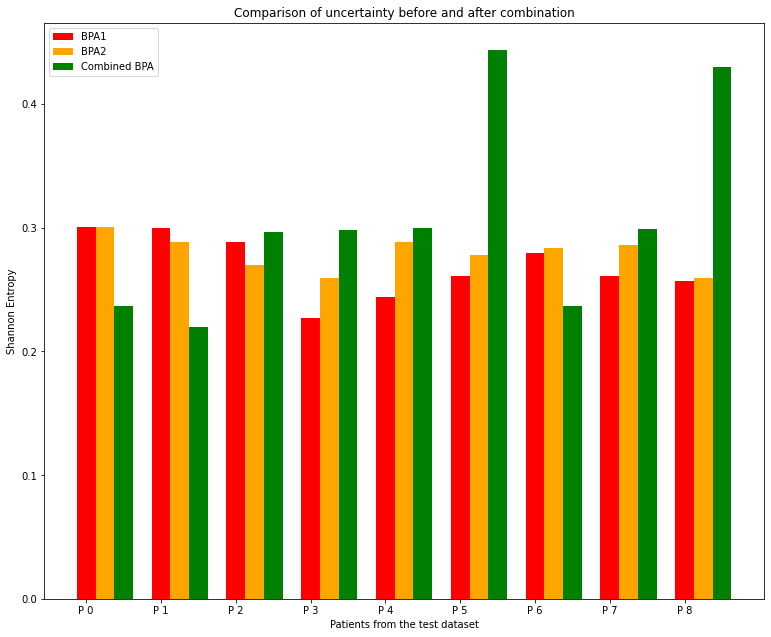

In [125]:
import numpy as np
import matplotlib.pyplot as plt

x =np.arange(9)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0, 0, 1, 1])

name_patients = []
for i in range(9):
    name_patients.append('P '+str(i))

bar1 = ax.bar(name_patients,bpa1_entropies[:9], color='r', width = 0.25)
bar2 = ax.bar(x+0.25,bpa2_entropies[:9], color='orange', width = 0.25)
bar3 = ax.bar(x+0.5,combined_entropies[:9], color='green', width = 0.25)
plt.xlabel("Patients from the test dataset")
plt.ylabel("Shannon Entropy")
plt.title("Comparison of uncertainty before and after combination")
plt.legend([bar1, bar2, bar3], ["BPA1", "BPA2", "Combined BPA"])


### weighted averaging combination rule

Defininf multiple models ::  4 models 

In [130]:
def ensemble(train_pool,test, num_samples=4, iters=60, lr=0.1):
    ens_preds = []
    ens_preds_proba = []
    data_uncertainties = []
    for seed in range(num_samples):
        model = CatBoostClassifier(random_seed=seed, iterations=iters,
                                  loss_function='MultiClass', eval_metric='Accuracy')
        model.fit(train_pool)
        ens_preds.append(model.predict(test))
        ens_preds_proba.append(model.predict_proba(test))
        entropies = []   # table des entropies sur tous les patients de la test-dataset
        for i in range(model.predict_proba(test).shape[0]):
            entropies.append(entropy(model.predict_proba(test)[i]))
        data_uncertainties.append(np.mean(entropies))
    return ens_preds, ens_preds_proba, data_uncertainties

In [131]:
ens_preds, ens_preds_proba, data_uncertainties = ensemble(train_dataset,x_test)

Learning rate set to 0.5
0:	learn: 0.3275862	total: 11.1ms	remaining: 655ms
1:	learn: 0.4482759	total: 38.6ms	remaining: 1.12s
2:	learn: 0.5517241	total: 65.6ms	remaining: 1.25s
3:	learn: 0.6379310	total: 93.2ms	remaining: 1.3s
4:	learn: 0.6724138	total: 120ms	remaining: 1.32s
5:	learn: 0.7758621	total: 147ms	remaining: 1.32s
6:	learn: 0.8448276	total: 174ms	remaining: 1.32s
7:	learn: 0.8965517	total: 202ms	remaining: 1.31s
8:	learn: 0.8965517	total: 230ms	remaining: 1.3s
9:	learn: 0.8965517	total: 257ms	remaining: 1.28s
10:	learn: 0.8965517	total: 284ms	remaining: 1.26s
11:	learn: 0.8965517	total: 311ms	remaining: 1.24s
12:	learn: 0.9137931	total: 338ms	remaining: 1.22s
13:	learn: 0.9482759	total: 364ms	remaining: 1.2s
14:	learn: 0.9655172	total: 392ms	remaining: 1.17s
15:	learn: 0.9827586	total: 419ms	remaining: 1.15s
16:	learn: 0.9827586	total: 446ms	remaining: 1.13s
17:	learn: 0.9827586	total: 473ms	remaining: 1.1s
18:	learn: 0.9827586	total: 499ms	remaining: 1.08s
19:	learn: 0.982

--- representing BPAs ------ 

In [132]:
bpa_model1 = bpa(ens_preds_proba[0])
bpa_model2 = bpa(ens_preds_proba[1])
bpa_model3 = bpa(ens_preds_proba[2])
bpa_model4 = bpa(ens_preds_proba[3])

In [133]:
# bpa_model1 , bpa_model2

#### Calculating credibility levels of the used models

_____ Distance of Jousselme _______

$ d_{ij} =\sqrt{\frac{1}{2}(\vec{m_i}-\vec{m_j})^T D(\vec{m_i}-\vec{m_j})}$

where  : $D(A,B) = \frac{|A \cap B|}{|A \cup B|}$, $A, B \in \Omega$

--- Defining the matrix ---- 

In [134]:
D = []
for i in range(10):
    l = []
    for j in range(11):
        if i == j: l.append(1)
        elif j == 10:  l.append(1/10)
        else : l.append(0)
    D.append(l)
    
l = [1/10]*10
l.append(1)
D.append(l)


In [135]:
D

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0.1],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0.1],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0.1],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0.1],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0.1],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0.1],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0.1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0.1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0.1],
 [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1]]

In [136]:
def distance_jousselme(bpa1, bpa2):
    vector_bpa = np.asarray(bpa1) - np.asarray(bpa2)
    result = np.dot(D, vector_bpa)
    result = 0.5 * np.dot(vector_bpa, result)
    return math.sqrt(result)    

Calculating the distance of Jousselme for every patient in the dataset

In [137]:
def distance_patients(bpa1, bpa2):
    distances = []
    for patient in range(15):
        distances.append(distance_jousselme(bpa1[patient], bpa2[patient]))
    return distances

In [138]:
# distance between models [12, 13, 14, 23, 24, 34]
distance1 = distance_patients(bpa_model1, bpa_model2)
distance2 = distance_patients(bpa_model1, bpa_model3)
distance3 = distance_patients(bpa_model1, bpa_model4)

distance4 = distance_patients(bpa_model2, bpa_model3)
distance5 = distance_patients(bpa_model2, bpa_model4)
distance6 = distance_patients(bpa_model3, bpa_model4)

distances = [distance1, distance2,distance3, distance4, distance5, distance6]


**Similarity computing**

$Sim(m_i, m_j) = 1-d(m_i, m_j)$

In [139]:
similarities = []
def similarity(distances):
    simil = []
    for patient in range(15):
        simil.append(1-distances[patient])  
    return simil

for i in range(6):
    similarities.append(similarity(distances[i]))
    

**computing support for every bpa_model**

$Sup(m_i) = \sum_{j=1, j\neq i}^{k}Sim(m_i, m_j)$

In [140]:
def support():
    supports = []
    support1 = [x+y+z for (x,y,z) in zip(distance1, distance2, distance3)]
    support2 = [x+y+z for (x,y,z) in zip(distance1, distance4, distance5)]
    support3 = [x+y+z for (x,y,z) in zip(distance2, distance4, distance6)]
    support4 = [x+y+z for (x,y,z) in zip(distance3, distance5, distance6)]
    supports.append(support1)
    supports.append(support2)
    supports.append(support3)
    supports.append(support4)
    return supports


In [141]:
supports_bpa = support()

**Credibility**

$Crd_i = \frac{Sup(m_i)}{\sum_{j=1}^{k}Sup(m_j)}$

In [142]:
def credibility(supports):
    credibilities= []
    sum_supports = [x+y+z+t for (x, y, z,t) in zip(supports_bpa[0], supports_bpa[1], supports_bpa[2], supports_bpa[3])]
    for i in range(4):
        value = [x/y for (x,y) in zip(supports[i],sum_supports )]
        credibilities.append(value)
    return credibilities

In [143]:
credibilities = credibility(supports_bpa)

In [144]:
credibilities

[[0.2180580936377471,
  0.21631693474852293,
  0.2864135148188393,
  0.2603979095502606,
  0.4459287804455704,
  0.22564626756321485,
  0.2481975141311499,
  0.17376376861600928,
  0.17145384209553102,
  0.1678226961775879,
  0.20988906358108222,
  0.24362003184692052,
  0.3505580986036225,
  0.22050932551730065,
  0.23091544493936408],
 [0.2180580936377471,
  0.17879414213963457,
  0.20183213438530687,
  0.2686297389868559,
  0.1974227896730268,
  0.2269491838961078,
  0.17738794216053094,
  0.2116434773548235,
  0.3750917593348107,
  0.16864064295996725,
  0.2017232414556334,
  0.25156010769945936,
  0.18684253235883275,
  0.326692283826331,
  0.23091544493936408],
 [0.2569967643412017,
  0.17879414213963457,
  0.2558230573765611,
  0.2677502267505645,
  0.17832421494070141,
  0.3149094996188389,
  0.17738794216053094,
  0.17658725003590406,
  0.2820005564741274,
  0.16751371281057534,
  0.2760958770286082,
  0.24362003184692047,
  0.25494280586430346,
  0.2322890651390678,
  0.29774

---  weighted averaging combination rule ---- 

In [145]:
bpa_model3

[[0, 0, 0, 0, 0, 0, 0.8492876353693162, 0, 0, 0, 0.15071236463068383],
 [0, 0, 0.9133405555515224, 0, 0, 0, 0, 0, 0, 0, 0.08665944444847762],
 [0, 0, 0, 0, 0, 0, 0, 0.3909421505376435, 0, 0, 0.6090578494623565],
 [0, 0.6272977527192114, 0, 0, 0, 0, 0, 0, 0, 0, 0.3727022472807886],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6810861054052195, 0.3189138945947805],
 [0, 0, 0.8559821512772963, 0, 0, 0, 0, 0, 0, 0, 0.14401784872270373],
 [0, 0, 0, 0.784993400106351, 0, 0, 0, 0, 0, 0, 0.215006599893649],
 [0, 0, 0, 0, 0.2412839759210781, 0, 0, 0, 0, 0, 0.7587160240789219],
 [0, 0, 0, 0, 0, 0.8064189575534239, 0, 0, 0, 0, 0.19358104244657615],
 [0, 0, 0, 0, 0, 0, 0.6683530837430198, 0, 0, 0, 0.3316469162569802],
 [0, 0, 0, 0.19985409596124917, 0, 0, 0, 0, 0, 0, 0.8001459040387509],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5290457121841758, 0.47095428781582416],
 [0, 0.6952585431085999, 0, 0, 0, 0, 0, 0, 0, 0, 0.3047414568914001],
 [0, 0, 0, 0, 0, 0, 0.4429223985029437, 0, 0, 0, 0.5570776014970563],
 [0, 0, 0, 0, 0,

In [146]:
np.asarray([1, 2])*2

array([2, 4])

**The combined BPA using the Weighted Averaging Combination rule**

$m_{WAE} = \sum_{i=1}^{i=n}w_i\times m_i$

where $w_i$ are credibility levels of the models

In [147]:
mwae = [i*x + j*y + k*z + l*t for (i, j, k, l, x, y, z, t) in 
        zip(credibilities[0], credibilities[1], credibilities[2], credibilities[3], np.asarray(bpa_model1), np.asarray(bpa_model2), np.asarray(bpa_model3), np.asarray(bpa_model4))]

In [150]:
mwae

[array([0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.6578581, 0.       , 0.       , 0.       , 0.3421419]),
 array([0.        , 0.        , 0.87542234, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.12457766]),
 array([0.        , 0.        , 0.        , 0.17159734, 0.        ,
        0.        , 0.26110987, 0.10001202, 0.        , 0.        ,
        0.46728077]),
 array([0.0996288 , 0.25428675, 0.06911712, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.57696733]),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.73656983,
        0.26343017]),
 array([0.        , 0.        , 0.38853772, 0.18646571, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.42499656]),
 array([0.        , 0.        , 0.        , 0.71565864, 0.        ,
   

In [159]:
# computing entropy for the weighted averaging combined BPA
def entropy(probs, epsilon=1e-8):
    log_probs = -np.log(probs + epsilon)
    return np.sum(probs * log_probs, axis=0)/np.log(10)  # to normalize


def entropy_patients():
    mwae_entropies = []
    for i in range(15):
        mwae_entropies.append(entropy(mwae[i]))
    return mwae_entropies
    

In [152]:
entropy_combined = entropy_patients()

In [153]:
# entropies from the used 4 models 
entropy1 = []
entropy2 = []
entropy3 = []
entropy4 = []
for i in range(15):
    entropy1.append(entropy(np.asarray(bpa_model1[i])))
    entropy2.append(entropy(np.asarray(bpa_model2[i])))
    entropy3.append(entropy(np.asarray(bpa_model3[i])))
    entropy4.append(entropy(np.asarray(bpa_model4[i])))

    

In [154]:
entropy1

[0.2203407136505821,
 0.08981941505829769,
 0.2924387282149336,
 0.25130843723888086,
 0.20068296699266983,
 0.30038283248206055,
 0.12873392529368208,
 0.2475466376898626,
 0.2907456838013347,
 0.27742811332398604,
 0.29699214869485796,
 0.2982632534413159,
 0.30039902255687095,
 0.27794288747458445,
 0.19580326252733957]

**Plotting the results for comparison**

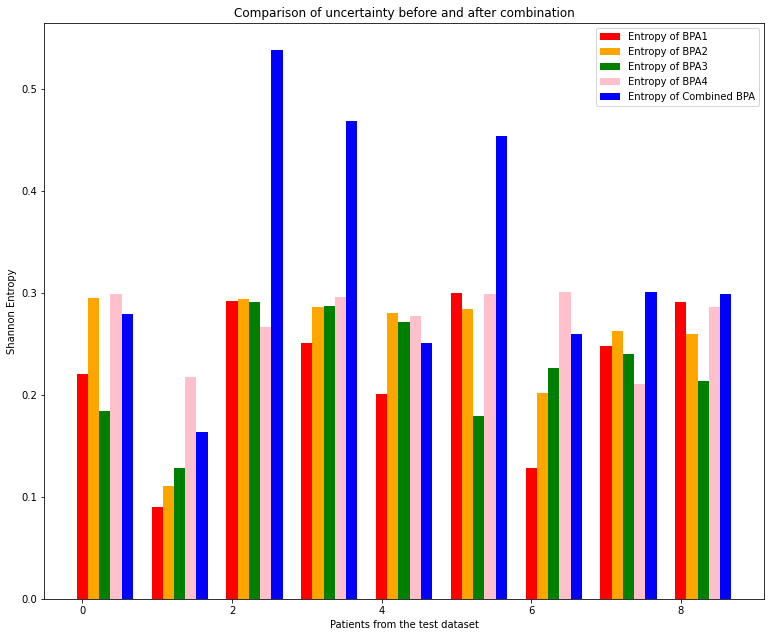

In [155]:
# for the first 7 patients
import numpy as np
import matplotlib.pyplot as plt

x =np.arange(9)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0, 0, 1, 1])

name_patients = []
for i in range(9):
    name_patients.append('P '+str(i))

bar1 = ax.bar(x,entropy1[:9], color='r', width = 0.15)
bar2 = ax.bar(x+0.15,entropy2[:9], color='orange', width = 0.15)
bar3 = ax.bar(x+0.3,entropy3[:9], color='green', width = 0.15)
bar4 = ax.bar(x+0.45,entropy4[:9], color='pink', width = 0.15)
bar5 = ax.bar(x+0.6,entropy_combined[:9], color='blue', width = 0.15)


plt.xlabel("Patients from the test dataset")
plt.ylabel("Shannon Entropy")
plt.title("Comparison of uncertainty before and after combination")
plt.legend([bar1, bar2, bar3, bar4, bar5], ["Entropy of BPA1", "Entropy of BPA2","Entropy of BPA3","Entropy of BPA4", "Entropy of Combined BPA"])


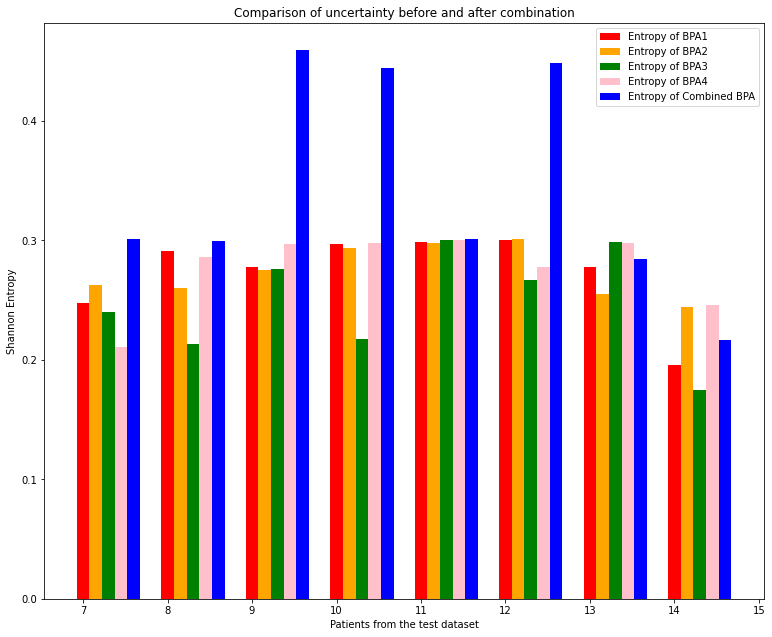

In [156]:
# for the last 7 patients
import numpy as np
import matplotlib.pyplot as plt

x =np.arange(7, 15)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0, 0, 1, 1])

name_patients = []
for i in range(8):
    name_patients.append('P '+str(i))

bar1 = ax.bar(x,entropy1[7:], color='r', width = 0.15)
bar2 = ax.bar(x+0.15,entropy2[7:], color='orange', width = 0.15)
bar3 = ax.bar(x+0.3,entropy3[7:], color='green', width = 0.15)
bar4 = ax.bar(x+0.45,entropy4[7:], color='pink', width = 0.15)
bar5 = ax.bar(x+0.6,entropy_combined[7:], color='blue', width = 0.15)


plt.xlabel("Patients from the test dataset")
plt.ylabel("Shannon Entropy")
plt.title("Comparison of uncertainty before and after combination")
plt.legend([bar1, bar2, bar3, bar4, bar5], ["Entropy of BPA1", "Entropy of BPA2","Entropy of BPA3","Entropy of BPA4", "Entropy of Combined BPA"])
